 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [109]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [110]:
# Reading whale returns
csv_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [111]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [112]:
# Drop nulls
whale_df.dropna(inplace=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [113]:
# Reading algorithmic returns
csv_path = Path("Resources/algo_returns.csv") 
# algo_df = pd.read_csv(csv_path)
algo_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [114]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [115]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [116]:
# Reading S&P 500 Closing Prices
csv_path = Path("Resources/sp500_history.csv") 
# sp500_df = pd.read_csv(csv_path)
sp500_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [117]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [118]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].replace('[\$,]', '', regex=True).astype(float)

In [119]:
# Calculate Daily Returns
sp500_df["S&P500 Returns"] = sp500_df["Close"].pct_change()

In [120]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head()

,Close,S&P500 Returns
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509


In [121]:
# Rename `Close` Column to be specific to this portfolio.
# sp500_df.head()
sp500_df = sp500_df.iloc[::-1]
sp500_df

,Close,S&P500 Returns
Date,,
2012-10-01,1444.49,-0.000872
2012-10-02,1445.75,-0.003611
2012-10-03,1450.99,-0.007123
2012-10-04,1461.40,0.000322
2012-10-05,1460.93,0.003469
...,...,...
2019-04-15,2905.58,-0.000509
2019-04-16,2907.06,0.002279
2019-04-17,2900.45,-0.001577


## Combine Whale, Algorithmic, and S&P 500 Returns

In [122]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([sp500_df, whale_df, algo_df], axis="columns", join="inner")
combined_df.head()

,Close,S&P500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2015-03-03,2107.78,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,2098.53,-0.001195,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,2101.04,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,2071.26,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,2079.43,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

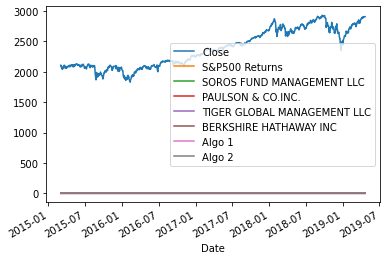

In [123]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

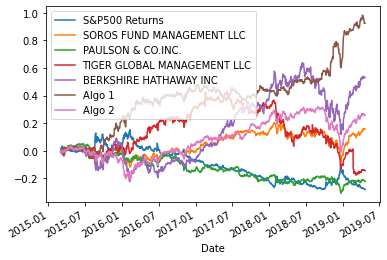

In [124]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df.loc[:, combined_df.columns != "Close"]).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Algo 1'}, xlabel='Date'>

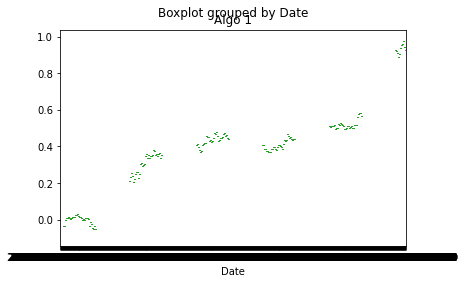

In [125]:
# Box plot to visually show risk
cumulative_returns.boxplot(by ='Date', column =['Algo 1'], grid = False)

### Calculate Standard Deviations

In [126]:
# Calculate the daily standard deviations of all portfolios
deviations = cumulative_returns.std()

deviations.head()

S&P500 Returns                 0.114846
SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [127]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = cumulative_returns["S&P500 Returns"].std()

# Determine which portfolios are riskier than the S&P 500
filter = (cumulative_returns > sp500_std).any()
cumulative_returns.columns[      
    (deviations.std() > sp500_std), 1   # mask
]

Index([], dtype='object')

### Calculate the Annualized Standard Deviation

In [128]:
# Calculate the annualized standard deviation (252 trading days)
cumulative_returns.std() * np.sqrt(252)

S&P500 Returns                 1.823124
SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

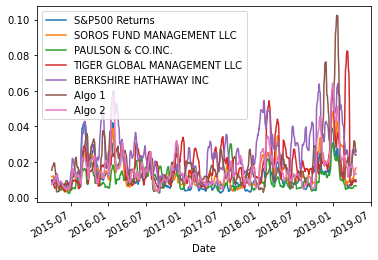

In [129]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cumulative_returns.rolling(window=21).std().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

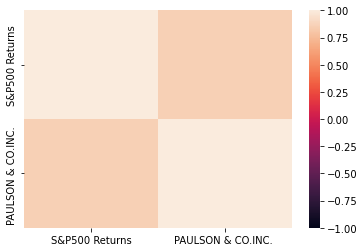

In [130]:
# Calculate the correlation
price_correlation = cumulative_returns[["S&P500 Returns", "PAULSON & CO.INC. "]].corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

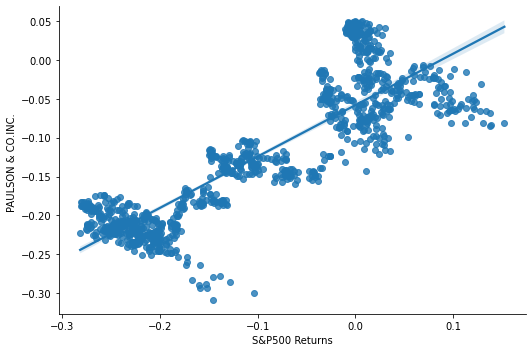

In [131]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns['PAULSON & CO.INC. '].cov(cumulative_returns['S&P500 Returns'])
# Calculate variance of S&P 500
variance = cumulative_returns['S&P500 Returns'].var()
# Computing beta
paulson_beta = covariance / variance
# Plot beta trend
sns.lmplot(x='S&P500 Returns', y='PAULSON & CO.INC. ', data=cumulative_returns, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [132]:
# Use `ewm` to calculate the rolling window
deviations.ewm(span=21, adjust=False).mean()

S&P500 Returns                 0.114846
SOROS FUND MANAGEMENT LLC      0.111059
PAULSON & CO.INC.              0.109003
TIGER GLOBAL MANAGEMENT LLC    0.112699
BERKSHIRE HATHAWAY INC         0.124397
Algo 1                         0.134158
Algo 2                         0.133930
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [133]:
# Annualized Sharpe Ratios
sharpe_ratios = ((cumulative_returns.mean()-deviations.mean()) * 252) / (cumulative_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

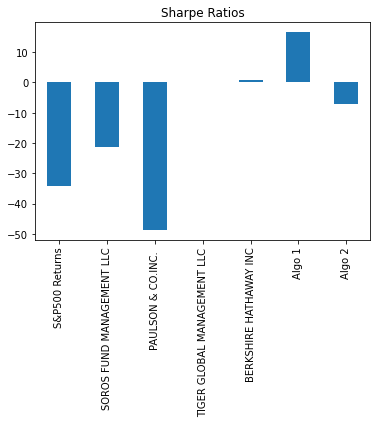

In [134]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [181]:
# Reading data from 1st stock
csv_path = Path("Resources/AMD.csv")
amd_df = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)
amd_df['Date'] = pd.to_datetime(amd_df['Date']).dt.date
amd_df.set_index("Date", inplace = True)
amd_df.head()

,Close
Date,
2015-03-03,3.14
2015-03-04,3.05
2015-03-05,2.98
2015-03-06,2.92
2015-03-09,2.93


In [180]:
# Reading data from 2nd stock
csv_path = Path("Resources/NVDA.csv")
nvda_df = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)
nvda_df['Date'] = pd.to_datetime(nvda_df['Date']).dt.date
nvda_df.set_index("Date", inplace = True)
nvda_df.head()

,Close
Date,
2015-03-03,5.55
2015-03-04,5.61
2015-03-05,5.72
2015-03-06,5.64
2015-03-09,5.65


In [178]:
# Reading data from 3rd stock
csv_path = Path("Resources/INTEL.csv")
intel_df = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)
intel_df['Date'] = pd.to_datetime(intel_df['Date']).dt.date
intel_df.set_index("Date", inplace = True)
intel_df.head()

,Close
Date,
2015-03-03,34.10
2015-03-04,34.12
2015-03-05,33.73
2015-03-06,33.19
2015-03-09,32.72


In [182]:
# Combine all stocks in a single DataFrame
pc_df = pd.concat([amd_df, nvda_df, intel_df], axis="columns", join="inner")
pc_df.columns = ['AMD Close', 'NVIDIA Close', 'Intel Close']
pc_df.head()

,AMD Close,NVIDIA Close,Intel Close
Date,,,
2015-03-03,3.14,5.55,34.10
2015-03-04,3.05,5.61,34.12
2015-03-05,2.98,5.72,33.73
2015-03-06,2.92,5.64,33.19
2015-03-09,2.93,5.65,32.72


In [139]:
# Reset Date index
# dates are already paired

In [140]:
# Reorganize portfolio data by having a column per symbol
# ???

In [183]:
# Calculate daily returns
pc_df["AMD returns"] = pc_df["AMD Close"].pct_change()
pc_df["NVDIA returns"] = pc_df["NVIDIA Close"].pct_change()
pc_df["Intel returns"] = pc_df["Intel Close"].pct_change()
# Drop NAs
pc_df.dropna(inplace=True)
# Display sample data
pc_df.tail()

,AMD Close,NVIDIA Close,Intel Close,AMD returns,NVDIA returns,Intel returns
Date,,,,,,
2019-04-08,28.53,47.95,55.68,-0.015528,0.004399,0.001439
2019-04-09,27.24,47.32,55.32,-0.045216,-0.013139,-0.006466
2019-04-10,27.83,48.03,55.75,0.021659,0.015004,0.007773
2019-04-11,27.79,47.89,55.80,-0.001437,-0.002915,0.000897
2019-04-12,27.85,47.50,56.42,0.002159,-0.008144,0.011111


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [189]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = pc_df[["AMD returns", "NVDIA returns", "Intel returns"]].dot(weights)
portfolio_returns.head()
# Display sample data


Date
2015-03-04   -0.005755
2015-03-05   -0.004924
2015-03-06   -0.016710
2015-03-09   -0.002988
2015-03-10   -0.005629
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [206]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([cumulative_returns.iloc[1:-5 , :], portfolio_returns], axis="columns", join="inner")
combined_df.columns = ['S&P500', "SOROS", "PAULSON", "TIGER", "BERKSHIRE", "Algo1", "Algo2", "My portfolio"]
combined_df.head()

,S&P500,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,My portfolio
Date,,,,,,,,
2015-03-04,0.003208,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.005755
2015-03-05,0.017632,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.004924
2015-03-06,0.013634,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.016710
2015-03-09,0.031123,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.002988
2015-03-10,0.033104,-0.012621,-0.002405,-0.015405,-0.020103,-0.023079,-0.016538,-0.005629


In [207]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.isnull().sum()

S&P500          0
SOROS           0
PAULSON         0
TIGER           0
BERKSHIRE       0
Algo1           0
Algo2           0
My portfolio    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [217]:
# Calculate the annualized `std`
deviations = combined_df.std() * np.sqrt(252)
deviations

S&P500          1.817243
SOROS           1.158684
PAULSON         1.403115
TIGER           2.359872
BERKSHIRE       3.820063
Algo1           3.634902
Algo2           2.086385
My portfolio    0.358954
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

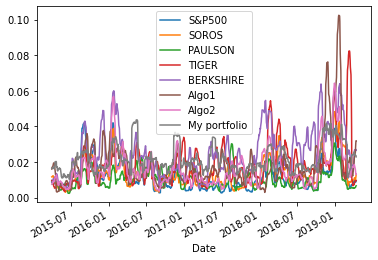

In [209]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).std().plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

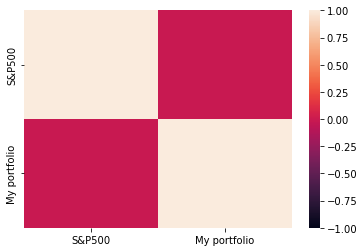

In [210]:
# Calculate and plot the correlation
price_correlation = combined_df[["S&P500", "My portfolio"]].corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

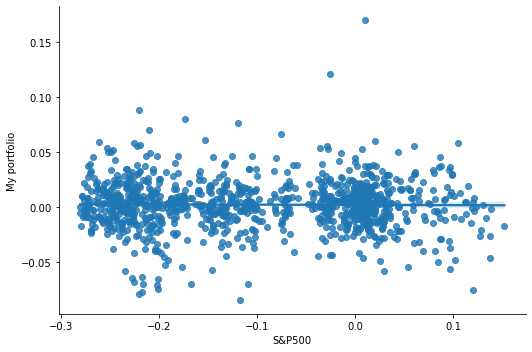

In [212]:
# Calculate and plot Beta
covariance = combined_df["My portfolio"].cov(combined_df['S&P500'])
# Calculate variance of S&P 500
variance = combined_df['S&P500'].var()
# Computing beta
pc_beta = covariance / variance
# Plot beta trend
sns.lmplot(x='S&P500', y='My portfolio', data=combined_df, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [218]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()-deviations.mean()) * 252) / (combined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

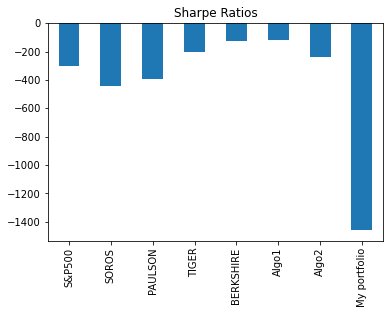

In [219]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Better than the rest I suppose